In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
from PIL import Image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Confirm the image is in grayscale and having only single channel

In [2]:
img = Image.open('data/A/0.jpg')

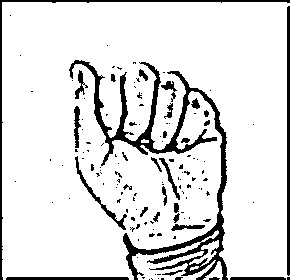

In [3]:
img

In [4]:
arr = np.asarray(img)

In [5]:
arr

array([[  1,   0,   0, ...,   0,   0,   0],
       [  0,   0,   2, ...,   2,   0,   0],
       [  0,   0, 253, ...,   0,   0,   0],
       ...,
       [  1,   1,   0, ...,   2,   1,   0],
       [  0,   5,   1, ...,   0,   0,   2],
       [  1,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [6]:
print(img.size)
print(img.mode)

(290, 280)
L


# Creating dataset from classified images

In [7]:
data_dir='data/'

## Training dataset

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(28, 28),
  batch_size=32)

Found 1514 files belonging to 37 classes.
Using 1212 files for training.


## Validation Dataset

In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(28,28),
  batch_size=32)

Found 1514 files belonging to 37 classes.
Using 302 files for validation.


In [10]:
train_class_names = train_ds.class_names
print(train_class_names)



['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'BLANK', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [11]:
val_class_names = val_ds.class_names
print(val_class_names)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'BLANK', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


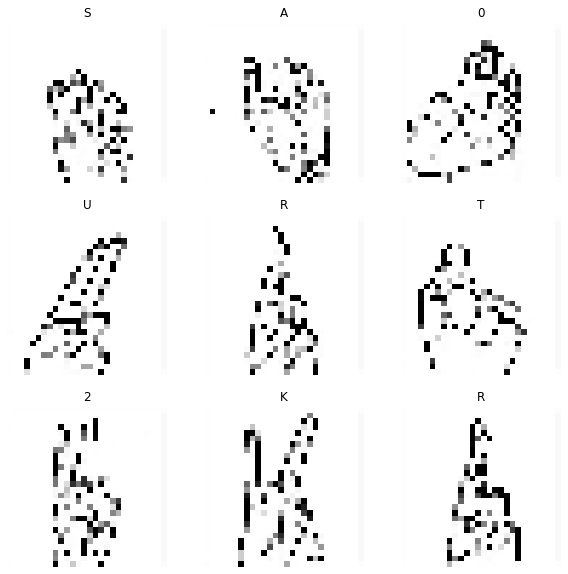

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [13]:
train_class_names[12]

'BLANK'

In [14]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 3)
(32,)


In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [17]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [18]:
for x,y in normalized_ds.take(1):
    print(x,y)

tf.Tensor(
[[[[0.99936986 0.99936986 0.99936986]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.99600834 0.99600834 0.99600834]]

  [[0.9974791  0.9974791  0.9974791 ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.9766109  0.9766109  0.9766109 ]]

  [[0.9974791  0.9974791  0.9974791 ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.9766109  0.9766109  0.9766109 ]]

  ...

  [[0.9974791  0.9974791  0.9974791 ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [0.9766109  0.9766109  0.9766109 ]]

  [[0.9974791  0.9974791  0.997479

In [19]:
num_classes = len(train_class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(28, 28, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [22]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
38/38 [==============================] - 2s 23ms/step - loss: 3.5766 - accuracy: 0.0693 - val_loss: 3.4637 - val_accuracy: 0.0927
Epoch 2/10
38/38 [==============================] - 1s 15ms/step - loss: 2.7698 - accuracy: 0.2995 - val_loss: 1.5312 - val_accuracy: 0.5828
Epoch 3/10
38/38 [==============================] - 1s 14ms/step - loss: 0.6663 - accuracy: 0.8234 - val_loss: 0.2343 - val_accuracy: 0.9272
Epoch 4/10
38/38 [==============================] - 1s 14ms/step - loss: 0.1084 - accuracy: 0.9777 - val_loss: 0.0389 - val_accuracy: 0.9967
Epoch 5/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0517 - accuracy: 0.9893 - val_loss: 0.0250 - val_accuracy: 0.9967
Epoch 6/10
38/38 [==============================] - 1s 15ms/step - loss: 0.0323 - accuracy: 0.9917 - val_loss: 0.0140 - val_accuracy: 0.9967
Epoch 7/10
38/38 [==============================] - 1s 14ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 0.9967
Epoch 8/10
38

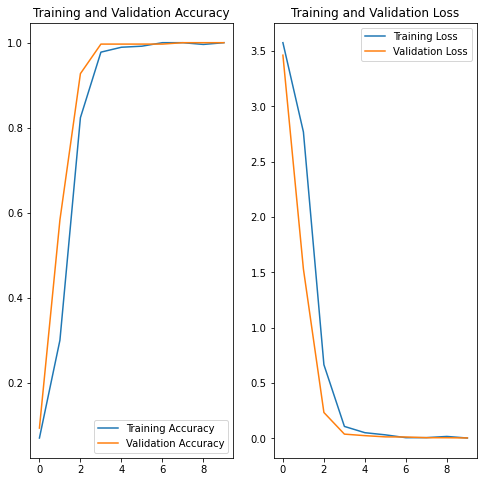

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
path="test/N.jpg"
test_img = tf.keras.utils.load_img(
    path, target_size=(28, 28)
)

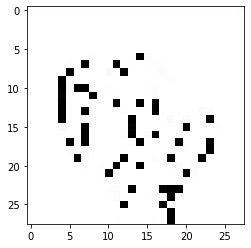

In [53]:
plt.imshow(test_img)

In [54]:
img_array = tf.keras.utils.img_to_array(test_img)


In [55]:
img_array

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [254., 254., 254.],
        [253., 253., 253.]],

       [[254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [56]:
img_array = tf.expand_dims(img_array, 0)

In [57]:
img_array

<tf.Tensor: shape=(1, 28, 28, 3), dtype=float32, numpy=
array([[[[254., 254., 254.],
         [254., 254., 254.],
         [254., 254., 254.],
         ...,
         [254., 254., 254.],
         [254., 254., 254.],
         [253., 253., 253.]],

        [[254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [2

In [58]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(train_class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to N with a 99.71 percent confidence.


In [59]:
model.save('my_model.h5')

In [60]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          1

In [62]:
#loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000

In [63]:
for layer in new_model.layers:
    weights = layer.get_weights()
    print(weights)

[]
[array([[[[ 1.61748350e-01, -7.92848412e-03,  4.28034877e-03,
           1.39767239e-02,  8.35866332e-02, -6.70524538e-02,
          -1.27426296e-01,  9.69656110e-02,  7.75693133e-02,
           3.50681394e-02,  2.15441898e-01,  1.96235716e-01,
          -1.28401611e-02, -2.39727393e-01, -2.52171725e-01,
          -5.71187921e-02],
         [ 7.05957487e-02, -4.83033322e-02, -3.13589051e-02,
           2.47900076e-02,  1.64449979e-02,  2.28433728e-01,
           5.40278293e-02,  1.27412118e-02, -5.21135405e-02,
          -1.06561683e-01,  1.69861585e-01,  1.45306021e-01,
          -9.27601457e-02, -2.56056726e-01, -2.53129452e-01,
          -6.24800362e-02],
         [ 5.93222566e-02,  1.12195089e-01,  1.58735916e-01,
          -1.00669220e-01, -6.53703734e-02, -1.13860264e-01,
           1.58327833e-01,  1.64412498e-01,  1.94994509e-01,
           1.51777655e-01,  2.26662204e-01,  9.67668518e-02,
          -2.26896331e-01, -1.35490730e-01, -2.22318862e-02,
          -1.88402325e-01